In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from scripts.play_store_scraper import BankReviewScraper
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from nltk.corpus import stopwords

In [9]:
bank = 'CBE'
app_id = 'com.combanketh.mobilebanking'

raw_path = '../data/raw/CBE_raw_reviews.csv'

In [10]:
scraper = BankReviewScraper(app_id, bank)
df = scraper.fetch_reviews(450)
print(len(df))
df.head()

450


,review,rating,date,bank,source
0,So bad now and hard to use,5,2025-06-09 18:31:56,CBE,Google Play
1,"it is so amazing app. but, it is better to upd...",5,2025-06-09 16:20:06,CBE,Google Play
2,v.good app,4,2025-06-09 11:49:09,CBE,Google Play
3,very good app,1,2025-06-09 01:24:23,CBE,Google Play
4,Very amazing app indeed. I'm enjoying it,5,2025-06-08 21:52:23,CBE,Google Play


In [5]:
# Save raw data
os.makedirs('../data/raw', exist_ok=True)
df.to_csv(raw_path, index=False)

In [11]:
df.dropna()
df.drop_duplicates()

,review,rating,date,bank,source
0,v.good app,4,2025-06-09 11:49:09,CBE,Google Play
1,very good app,1,2025-06-09 01:24:23,CBE,Google Play
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08 21:52:23,CBE,Google Play
3,Best,5,2025-06-08 18:25:37,CBE,Google Play
4,20 years,5,2025-06-08 12:04:48,CBE,Google Play
...,...,...,...,...,...
445,best,5,2025-03-30 18:15:17,CBE,Google Play
446,It is very excellent anddynamic plus user frie...,5,2025-03-30 17:56:18,CBE,Google Play
447,Very God thanks,5,2025-03-30 17:41:58,CBE,Google Play
448,The sum is good.,3,2025-03-30 17:26:34,CBE,Google Play


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  450 non-null    object        
 1   rating  450 non-null    int64         
 2   date    450 non-null    datetime64[ns]
 3   bank    450 non-null    object        
 4   source  450 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


In [13]:
df.value_counts('rating')

rating
5    314
1     49
4     46
3     25
2     16
Name: count, dtype: int64

In [5]:
print(df['rating'].mean())

4.2555555555555555


In [14]:
df.head(20)

,review,rating,date,bank,source
0,v.good app,4,2025-06-09 11:49:09,CBE,Google Play
1,very good app,1,2025-06-09 01:24:23,CBE,Google Play
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08 21:52:23,CBE,Google Play
3,Best,5,2025-06-08 18:25:37,CBE,Google Play
4,20 years,5,2025-06-08 12:04:48,CBE,Google Play
5,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play
6,More than garrantty bank EBC.,4,2025-06-07 18:21:26,CBE,Google Play
7,really am happy to this app it is Siple to use...,5,2025-06-07 11:02:38,CBE,Google Play
8,I liked this app. But the User interface is ve...,2,2025-06-07 10:50:29,CBE,Google Play
9,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06 09:54:11,CBE,Google Play


In [4]:
#for consistent result
DetectorFactory.seed = 0

In [13]:
def detect_language(review):
    try:
        return detect(review)
    except LangDetectException:
        return "error"


In [14]:
df['language'] = df['review'].apply(detect_language)

In [15]:
df_clean = df[df['language'] == 'en'].drop(columns='language')

In [17]:
# filtered data by language
df_clean.tail(2)

,review,rating,date,bank,source
448,The sum is good.,3,2025-03-30 17:26:34,CBE,Google Play
449,best of bests,5,2025-03-30 17:14:52,CBE,Google Play


In [21]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 1 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  226 non-null    object        
 1   rating  226 non-null    int64         
 2   date    226 non-null    datetime64[ns]
 3   bank    226 non-null    object        
 4   source  226 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.6+ KB
None


In [16]:
df_clean.count()

review    232
rating    232
date      232
bank      232
source    232
dtype: int64

In [50]:
df_clean.isnull().sum()

review    0
rating    0
date      0
bank      0
source    0
dtype: int64

In [22]:
df_clean.shape

(226, 5)

In [23]:
df_clean.to_csv('cleaned_data.csv', index=False)

In [22]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


In [23]:
# Function to classify sentiment
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [24]:
df_clean['review'] = df_clean['review'].astype(str)

In [25]:
df_clean['sentiment_score'] = df_clean['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_clean['sentiment'] = df_clean['sentiment_score'].apply(get_sentiment)

In [26]:
df_clean

,review,rating,date,bank,source,sentiment_score,sentiment
0,So bad now and hard to use,5,2025-06-09 18:31:56,CBE,Google Play,-0.6361,Negative
1,"it is so amazing app. but, it is better to upd...",5,2025-06-09 16:20:06,CBE,Google Play,0.9049,Positive
4,Very amazing app indeed. I'm enjoying it,5,2025-06-08 21:52:23,CBE,Google Play,0.8173,Positive
6,20 years,5,2025-06-08 12:04:48,CBE,Google Play,0.0000,Neutral
7,A great app. It's like carrying a bank in your...,4,2025-06-07 20:21:52,CBE,Google Play,0.7650,Positive
...,...,...,...,...,...,...,...
437,there is some issue the process it delay,3,2025-03-31 09:28:40,CBE,Google Play,-0.3182,Negative
438,what an amazing application in Ethiopian Banki...,5,2025-03-31 06:12:02,CBE,Google Play,0.7955,Positive
446,it is very good app,5,2025-03-30 18:58:06,CBE,Google Play,0.4927,Positive
448,It is very excellent anddynamic plus user frie...,5,2025-03-30 17:56:18,CBE,Google Play,0.9020,Positive


In [38]:
sentiment_counts = df_clean['sentiment'].value_counts()

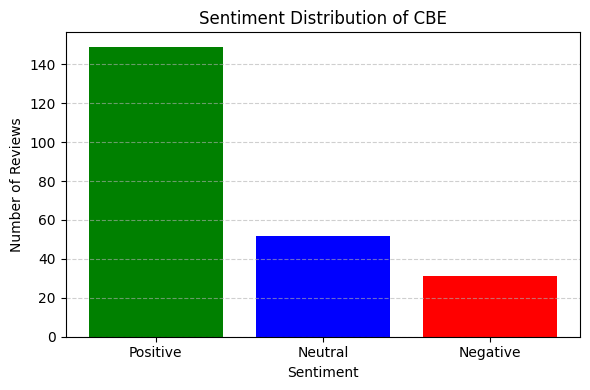

In [46]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of CBE')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()